In [ ]:
## Introduction
# This Project analysis the Pima Indians Diabetes dataset to indentify the key factors that may contribute to the onset of diabetes

# ** Objective**
# To explore the dataset, clean any inconsistencies, and gain insights into what separates diabetic patients from non-diabetic ones.

# **Dataset Source**
http://www.kaggle.com/datasets/uciml/pima-indians-diabetes-dataset]
(https://www.kagle.com/dataset/uciml/pima-indians-diabetes-database)

In [2]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
import pandas as pd

df = pd.read_csv("Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape  # rows and columns
df.info()  # Data types and null values
df.describe()  # Summary statistcs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Cek for invalid Values(e.g., zeroes)
cols_with_zeros =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_with_zeros] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

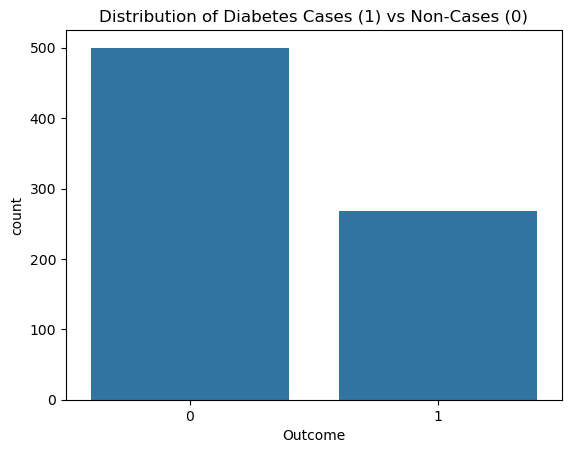

In [ ]:
# Class Distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Outcome')
plt.title("Distribution of Diabetes Cases (1) vs Non-Cases (0)")
plt.show()

In [ ]:
# Mean Comparison by Outcome

df.groupby('Outcome').mean()
df.groupby

<bound method DataFrame.groupby of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627 

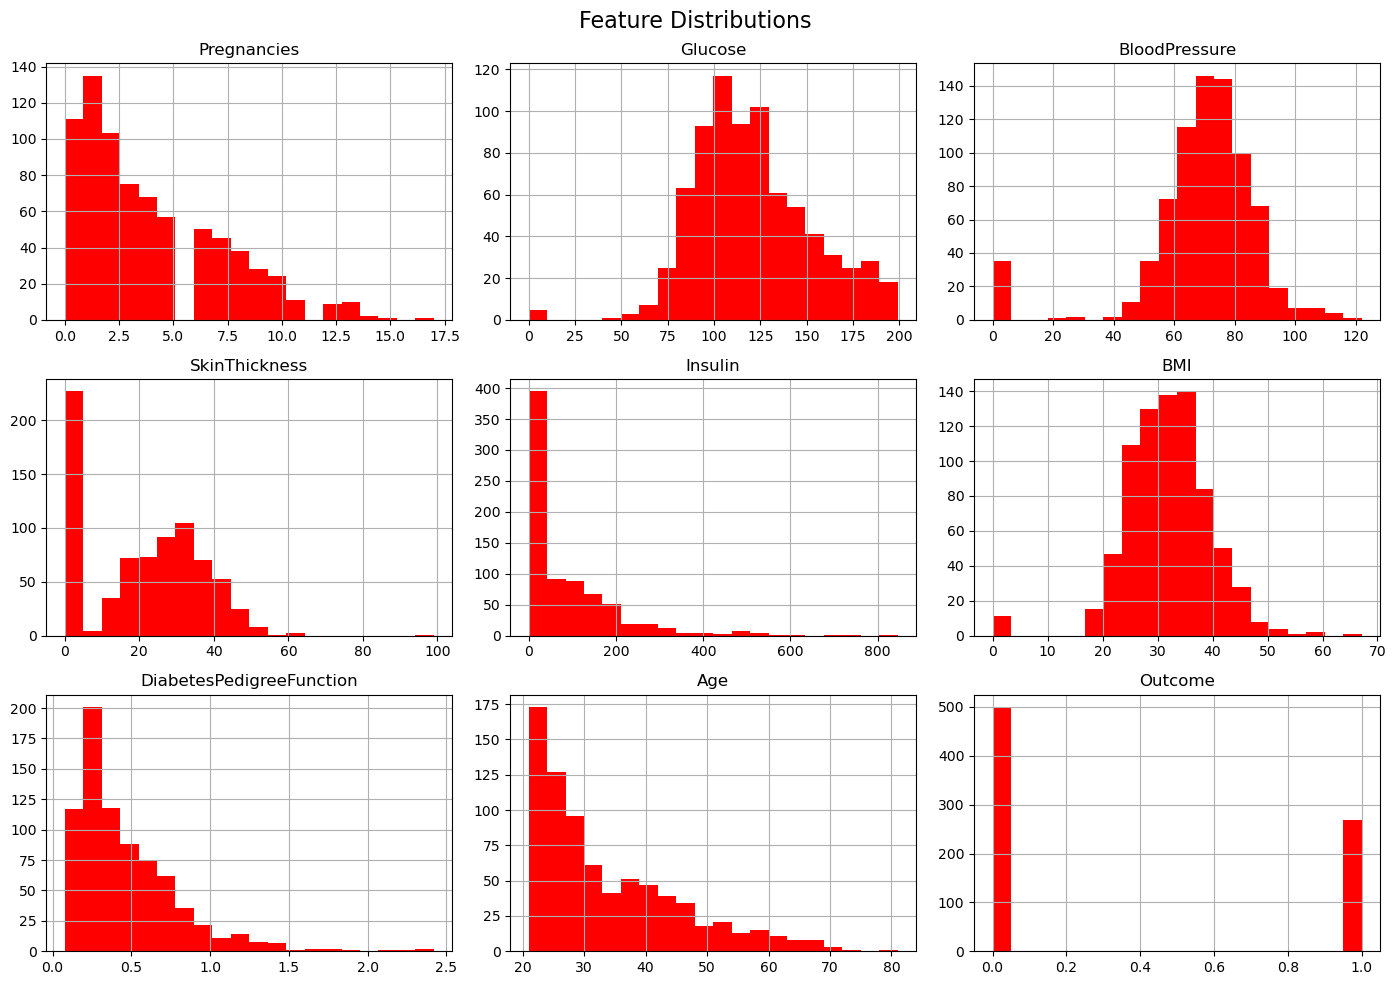

In [ ]:
# Feature Distributions

df.hist(bins=20, figsize=(14, 10), color='red')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

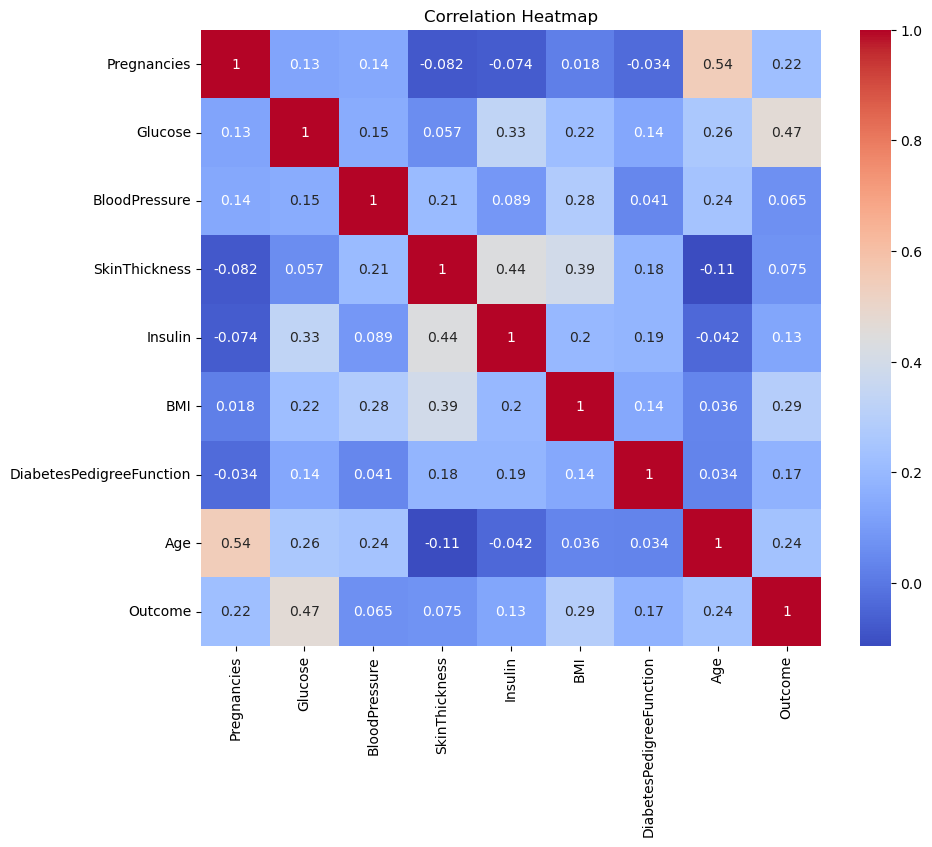

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

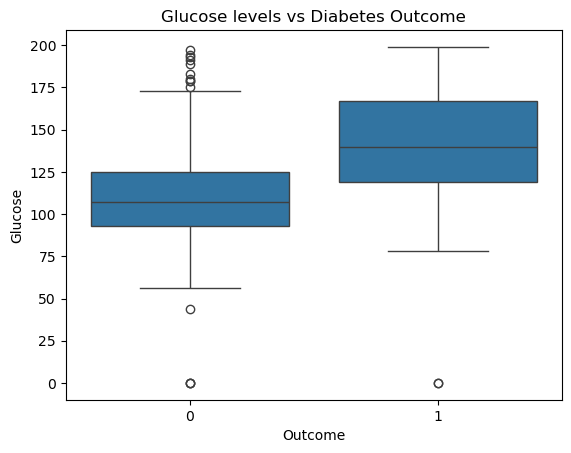

In [ ]:
# Boxplots by Outcome
# For Glucose levels by Outcome

sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose levels vs Diabetes Outcome")
plt.show()

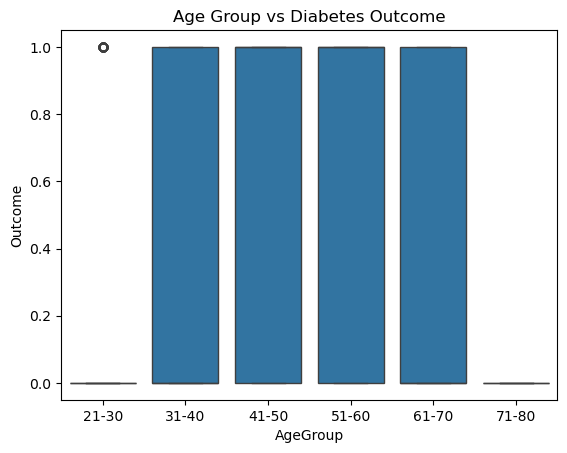

In [ ]:
# Boxplots by Age
# For Glucose levels by Outcome

df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=["21-30", "31-40", "41-50", "51-60", "61-70", "71-80"])
sns.boxplot(x='AgeGroup', y='Outcome', data=df)
plt.title("Age Group vs Diabetes Outcome")
plt.show()

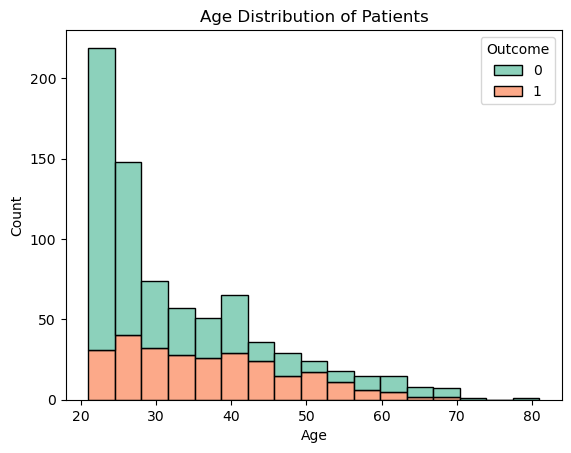

In [ ]:
# Age Distribution by Outcome

sns.histplot(data=df, x='Age', hue='Outcome', multiple='stack', palette='Set2')
plt.title("Age Distribution of Patients")
plt.show()